<a href="https://colab.research.google.com/github/AUT-Student/SML-HW2/blob/main/SML_HW2_Q6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><b>In the name of God</b></center>

<b>Course</b>: Statistical Machine Learning
<br>
<b>Description:</b> HomeWork 2 | Question 6
<br>
<b>Developer</b>: Alireza Mazochi (400131075)

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

# Dataset

In [2]:
np.random.seed(0)

In [3]:
dataset = np.random.normal(loc=5, scale=1, size=100)

# Posterior Distribution $\mu$

In [5]:
mus = np.linspace(3, 7, 100)
fs = []
for mu in mus:
  fi = 1
  for xi in dataset:
    fi *= norm(mu, 1).pdf(xi)
  fs.append(fi)

c = sum(fs)
fs /= c

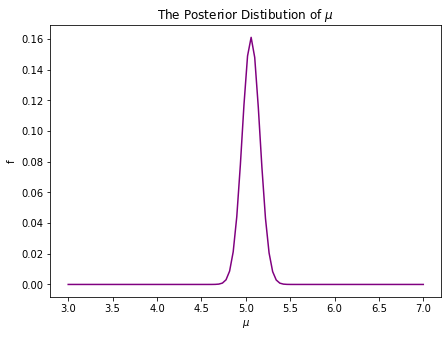

In [6]:
plt.xlabel(r"$\mu$")
plt.ylabel("f")
plt.title(r"The Posterior Distibution of $\mu$")
plt.plot(mus, fs, color="purple")
plt.gcf().set_size_inches(7,5)
plt.show()

In [7]:
posterior_samples = random.choices(population=mus, weights=fs, k=500)

<ipython-input-12-bd599d14032a>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().get_yaxis().set_visible(False)


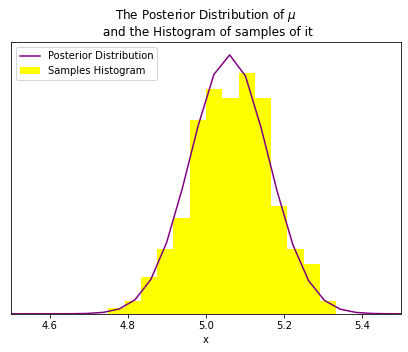

In [12]:
plt.plot(mus, fs*25, color="purple", label="Posterior Distribution")
plt.hist(np.array(posterior_samples), bins=np.linspace(4.5,5.5,25), color="yellow", density=True, label="Samples Histogram")
plt.gcf().set_size_inches(7, 5)
plt.title(f"The Posterior Distribution of $\mu$\n and the Histogram of samples of it")
plt.xlabel("x")
plt.axes().get_yaxis().set_visible(False)
plt.xlim([4.5,5.5])
plt.legend()
plt.show()

# Posterior Distribution $\theta$

In [53]:
mu_hat = np.array(dataset).mean()

In [57]:
def pdf_theta(theta):
  return (10/theta)*norm(0, 1).pdf(10*(np.log(theta)-mu_hat))

ys = np.linspace(0.01, 300, 10000)
fs = pdf_theta(ys)

In [61]:
theta_samples = []
for _ in range(10000):
  theta_samples.append(np.exp(np.random.normal(loc=mu_hat, scale=1, size=100).mean()))
theta_samples=np.array(theta_samples)

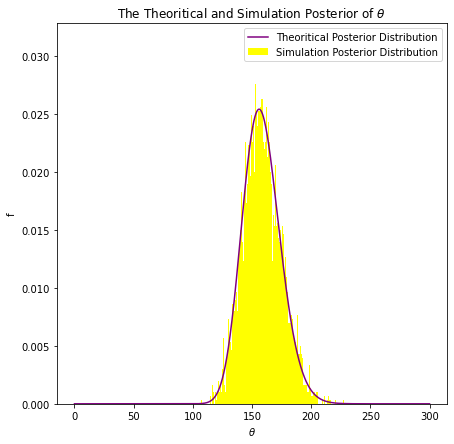

In [63]:
plt.plot(ys, fs, color="purple", label="Theoritical Posterior Distribution")
plt.hist(theta_samples, bins=np.linspace(0, 300, 1000), color="yellow", density=True, label="Simulation Posterior Distribution")

plt.xlabel(r"$\theta$")
plt.ylabel("f")
plt.title(r"The Theoritical and Simulation Posterior of $\theta$")
plt.legend()
plt.gcf().set_size_inches(7, 7)
plt.show()

In [64]:
theta_samples = sorted(theta_samples)

In [69]:
print(f"97% Confident Interval = {theta_samples[int(10000*0.03/2)]}, {theta_samples[-int(10000*0.03/2)]}")
print(f"93% Confident Interval = {theta_samples[int(10000*0.07/2)]}, {theta_samples[-int(10000*0.07/2)]}")

97% Confident Interval = 126.52818440841259, 195.36699669866493
93% Confident Interval = 131.54511495696204, 189.156226950727
